### Import Libraries

In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

### Import Data

In [618]:
Loandf = pd.read_csv("LoanPrediction.csv")
Loandf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

Basic Information

In [619]:
Loandf.shape

(614, 13)

In [620]:
Loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [621]:
Loandf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Check Duplicate

In [622]:
Loandf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [623]:
Loandf.duplicated().sum()

0

Check Unique value

In [624]:
Loandf.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Drop unimportant column

In [625]:
Loandf = Loandf.drop("Loan_ID", axis = 1)
Loandf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Check Missing Value

In [626]:
Loandf.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Feature Engineering

##### Imputation

Replace Missing Value with the Most Frequent Value

In [627]:
Loandf['Gender'].fillna(Loandf['Gender'].mode()[0],inplace=True)
Loandf['Married'].fillna(Loandf['Married'].mode()[0],inplace=True)
Loandf['Dependents'].fillna(Loandf['Dependents'].mode()[0],inplace=True)
Loandf['Self_Employed'].fillna(Loandf['Self_Employed'].mode()[0],inplace=True)
Loandf['LoanAmount'].fillna(Loandf['LoanAmount'].mode()[0],inplace=True)
Loandf['Loan_Amount_Term'].fillna(Loandf['Loan_Amount_Term'].mode()[0],inplace=True)
Loandf['Credit_History'].fillna(Loandf['Credit_History'].mode()[0],inplace=True)

In [628]:
Loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Label Encoding

Change categorical to numeric

In [629]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in Loandf.columns:
    if Loandf[col].dtype == 'object':
        Loandf[col] = le.fit_transform(Loandf[col])

In [630]:
Loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [631]:
#Gender => 0 = Female, 1 = Male
#Married => 0 = No, 1 = Yes
#Education => 0 = Graduate, 1 = Not Graduate
#Self_Employed => 0 = No, 1 = Yes
#Property_Area => 0 = Rural, 1 = Semiurban, 2 = Urban
#Loan_Status => 0 = No, 1 = Yes

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

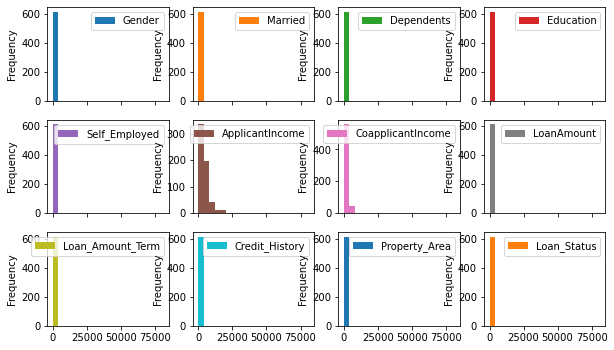

In [632]:
Loandf.plot.hist(subplots=True, layout=(5,4), figsize=(10, 10), bins=20)

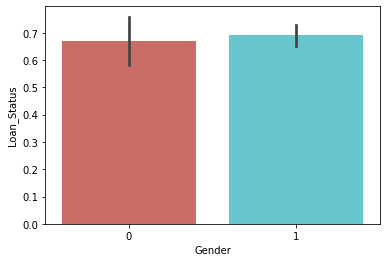

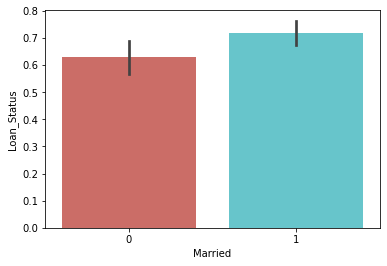

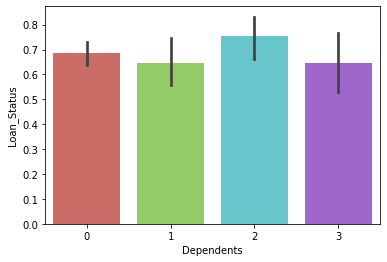

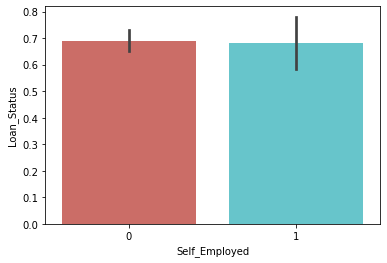

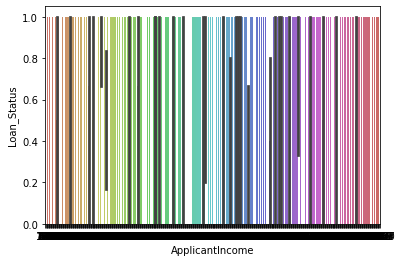

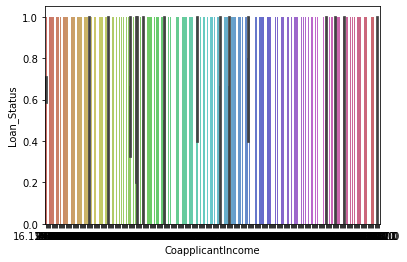

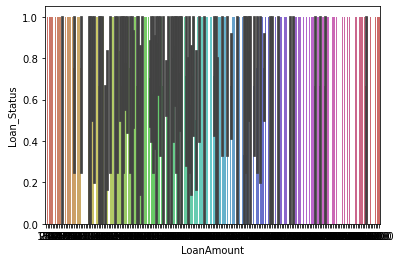

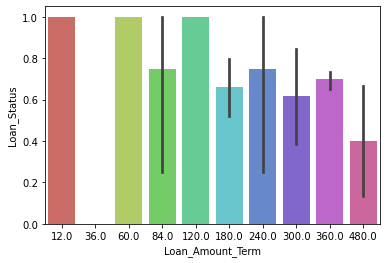

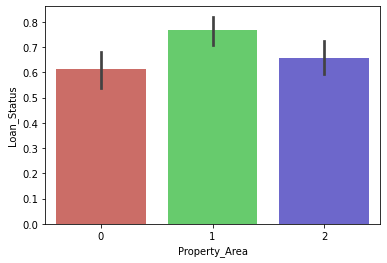

In [633]:
sns.barplot(data= Loandf, x = 'Gender', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Married', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Dependents', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Self_Employed', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'ApplicantIncome', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'CoapplicantIncome', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'LoanAmount', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Loan_Amount_Term', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Property_Area', y = 'Loan_Status', palette='hls')
plt.show()

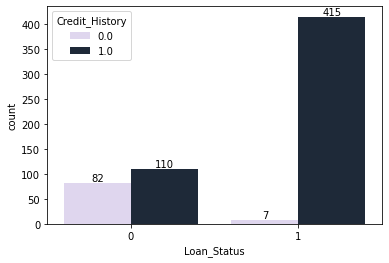

In [634]:
ax = sns.countplot(x='Loan_Status',hue='Credit_History',data=Loandf,  palette = "ch:s=-.3,r=.17")
for container in ax.containers:
    ax.bar_label(container)

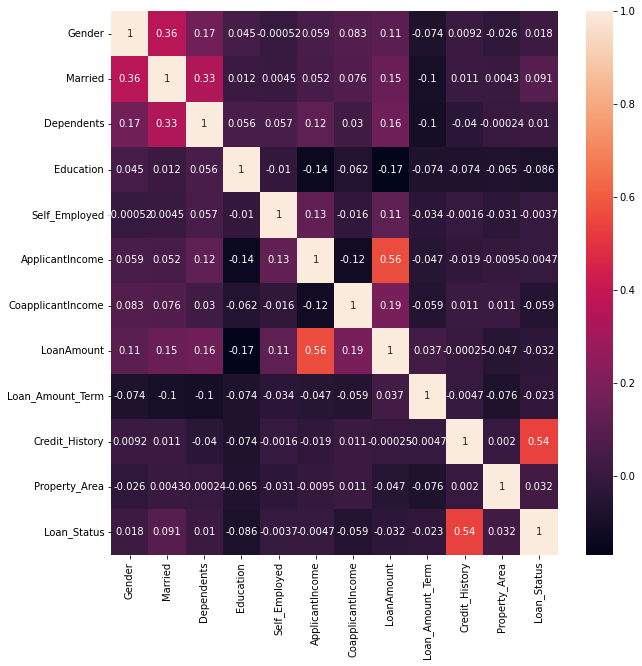

In [635]:
ax,fig = plt.subplots(figsize=(10,10))
data= Loandf.corr()
sns.heatmap(data, annot=True)
plt.show()

#### Find Value Counts

In [636]:
Loandf['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [637]:
Loandf['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [638]:
Loandf['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [639]:
Loandf['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [640]:
Loandf['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [641]:
Loandf['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [642]:
Loandf['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [643]:
Loandf['LoanAmount'].value_counts()

120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [644]:
Loandf['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [645]:
Loandf['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [646]:
Loandf['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [647]:
Loandf['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### Creating Feature

In [648]:
for i in [Loandf]:
    i["TotalIncome"] = i["ApplicantIncome"] + i["CoapplicantIncome"]

#### Find Outliers

In [649]:
Loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,7583.0


In [650]:
def find_outliers_IQR(Loandf):
   q1 = Loandf.quantile(0.25)
   q3 = Loandf.quantile(0.75)
   IQR = q3-q1
   outliers = Loandf[((Loandf<(q1-1.5*IQR)) | (Loandf>(q3+1.5*IQR)))]
   return outliers

In [651]:
outliers = find_outliers_IQR(Loandf['TotalIncome'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 50
max outlier value: 81000.0
min outlier value: 12876.0


#### Check Label

In [652]:
# Create Classification version of target variable
x = Loandf.drop(['Loan_Status'], axis = 1)
y = Loandf['Loan_Status']

#### Scaling

In [653]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xnew = scaler.fit_transform(x)

# Train machine learning models & Evaluate machine learning models (With Non-scaling attribute)

In [654]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=128)

# see train and test dataset shape
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (491, 12)
y_train: (491,)
x_test: (123, 12)
y_test: (123,)


## Random Forest

In [655]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
prediksi_rf = rf.predict(x_test)
yp = (prediksi_rf >= 0.5).astype(int)
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        38
           1       0.84      0.91      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.76      0.77       123
weighted avg       0.81      0.81      0.81       123



## Decision Tree

In [656]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

#Predict
prediksi_dt = dt.predict(x_test)
print(classification_report(y_test, prediksi_dt))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        38
           1       0.86      0.81      0.84        85

    accuracy                           0.78       123
   macro avg       0.75      0.76      0.75       123
weighted avg       0.79      0.78      0.78       123



## Logistic Regression

In [657]:
#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lrR = classification_report(lr_pred, y_test)

print(lrR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.82       123

    accuracy                           0.69       123
   macro avg       0.50      0.35      0.41       123
weighted avg       1.00      0.69      0.82       123



## SVM

In [658]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
prediksi_svm = svm.predict(x_test)
print(classification_report(y_test, prediksi_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123



## K-Nearest Neighbors

In [659]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(x_train, y_train)

#Prediction
prediksi_knn = knn.predict(x_test)
prediksi_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [660]:
print(classification_report(y_test, prediksi_knn))

              precision    recall  f1-score   support

           0       0.50      0.08      0.14        38
           1       0.70      0.96      0.81        85

    accuracy                           0.69       123
   macro avg       0.60      0.52      0.47       123
weighted avg       0.64      0.69      0.60       123



In [661]:
data = [['KNN', 0.6910569105691057, 0.8118811881188118, 0.7008547008547008, 0.9647058823529412],  
                ['Logistic Regression', 0.6910569105691057, 0.8173076923076924, 1.0, 0.6910569105691057],
                ['Decision Tree', 0.7642276422764228, 0.8220858895705521, 0.8589743589743589, 0.788235294117647],
                ['SVM', 0.6910569105691057, 0.8173076923076924, 0.6910569105691057, 1.0], 
                ['Random Forest', 0.8130081300813008, 0.8700564971751413, 0.8369565217391305, 0.9058823529411765]]
df = pd.DataFrame(data, columns = ['Method','Accuracy','F1', 'Precision', 'Recall'])
df

,Method,Accuracy,F1,Precision,Recall
0,KNN,0.691057,0.811881,0.700855,0.964706
1,Logistic Regression,0.691057,0.817308,1.000000,0.691057
2,Decision Tree,0.764228,0.822086,0.858974,0.788235
3,SVM,0.691057,0.817308,0.691057,1.000000
4,Random Forest,0.813008,0.870056,0.836957,0.905882


# Train machine learning models & Evaluate machine learning models (With scaled attribute)

In [662]:
x_train, x_test, y_train, y_test = train_test_split(xnew, y, test_size = 0.20, random_state=128)

# see train and test dataset shape
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (491, 12)
y_train: (491,)
x_test: (123, 12)
y_test: (123,)


## Random Forest

In [663]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [664]:
#Predict
prediksi_rf_new = rf.predict(x_test)
print(prediksi_rf_new)

[0.97 0.71 0.25 0.88 0.92 0.95 0.44 0.8  0.93 0.68 0.83 0.96 0.99 0.67
 0.78 0.89 0.62 0.89 0.91 0.38 0.78 0.9  0.86 0.28 0.62 0.84 0.13 0.51
 0.03 0.58 0.66 0.9  0.72 0.08 0.98 0.69 0.03 0.88 0.79 0.51 0.99 0.69
 0.55 0.83 0.95 0.74 0.8  0.53 0.89 1.   0.85 0.68 0.77 0.15 0.86 0.61
 0.   0.95 0.77 0.84 0.9  0.8  0.97 0.46 0.89 0.97 0.31 0.95 0.04 0.9
 0.82 1.   0.7  0.99 0.94 0.78 0.82 0.81 0.08 0.44 0.95 1.   0.73 0.99
 0.62 0.82 0.94 0.88 0.66 0.81 0.95 0.08 0.8  0.71 0.94 0.04 0.86 0.96
 0.84 0.73 0.17 0.01 0.99 0.37 0.85 0.49 0.99 0.49 0.45 0.95 0.89 0.2
 0.41 0.47 0.94 0.37 0.   0.36 0.7  0.   0.4  0.69 0.83]


In [665]:
ypnew = (prediksi_rf >= 0.5).astype(int)
ypnew

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [667]:
print(classification_report(y_test, ypnew))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        38
           1       0.84      0.91      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.76      0.77       123
weighted avg       0.81      0.81      0.81       123



## SVM

In [668]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

#Predict
prediksi_svm_new = svm.predict(x_test)
print(prediksi_svm_new)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1]


In [669]:
print(classification_report(y_test, prediksi_svm_new))

              precision    recall  f1-score   support

           0       0.88      0.37      0.52        38
           1       0.78      0.98      0.86        85

    accuracy                           0.79       123
   macro avg       0.83      0.67      0.69       123
weighted avg       0.81      0.79      0.76       123



## Logistic Regression 

In [670]:
#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_prednew = lr.predict(x_test)
lrR = classification_report(lr_prednew, y_test)

print(lrR)

              precision    recall  f1-score   support

           0       0.39      0.83      0.54        18
           1       0.96      0.78      0.86       105

    accuracy                           0.79       123
   macro avg       0.68      0.81      0.70       123
weighted avg       0.88      0.79      0.82       123



## K-Nearest Neighbors

In [671]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [672]:
#Prediction
prediksi_knn_new = knn.predict(x_test)
prediksi_knn_new

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [673]:
# Print the accuracy
print(knn.score(x_test, y_test))

0.7804878048780488


In [674]:
print(classification_report(y_test, prediksi_knn_new))

              precision    recall  f1-score   support

           0       0.87      0.34      0.49        38
           1       0.77      0.98      0.86        85

    accuracy                           0.78       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.78      0.75       123



## Desicion Tree

In [675]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [676]:
#Predict
prediksi_dt_new = dt.predict(x_test)
print(classification_report(y_test, prediksi_dt_new))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        38
           1       0.86      0.79      0.82        85

    accuracy                           0.76       123
   macro avg       0.73      0.75      0.74       123
weighted avg       0.78      0.76      0.77       123



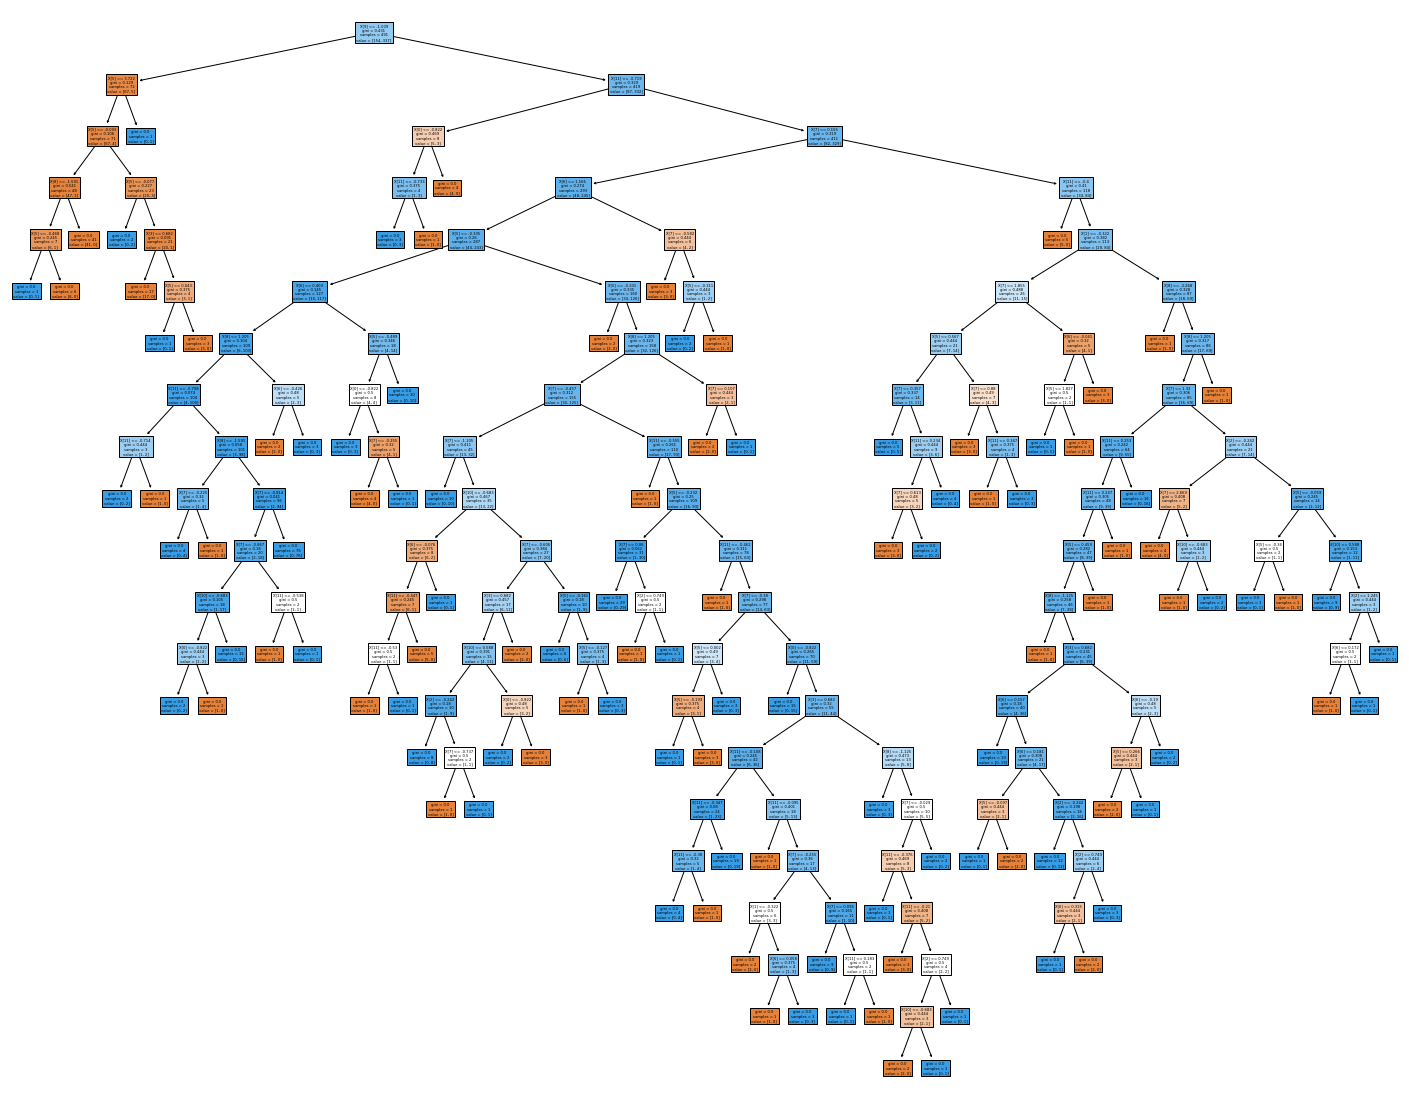

In [677]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   filled=True)

In [678]:
print(classification_report(y_test, prediksi_dt_new))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        38
           1       0.86      0.79      0.82        85

    accuracy                           0.76       123
   macro avg       0.73      0.75      0.74       123
weighted avg       0.78      0.76      0.77       123



In [682]:
scaled = [['KNN', 0.7804878048780488, 0.8601036269430051, 0.7685185185185185, 0.9764705882352941],  
                ['Logistic Regression', 0.7886178861788617, 0.8631578947368421, 0.780952380952381, 0.9647058823529412], 
                ['Decision Tree', 0.7804878048780488, 0.8383233532934131, 0.8536585365853658, 0.8235294117647058],
                ['SVM', 0.7886178861788617, 0.8645833333333333, 0.7757009345794392, 0.9764705882352941], 
                ['Random Forest', 0.8130081300813008, 0.8700564971751413, 0.8369565217391305, 0.9058823529411765]]
df = pd.DataFrame(scaled, columns = ['Method(Scaled Data)','Accuracy','F1', 'Precision', 'Recall'])
df

,Method(Scaled Data),Accuracy,F1,Precision,Recall
0,KNN,0.780488,0.860104,0.768519,0.976471
1,Logistic Regression,0.788618,0.863158,0.780952,0.964706
2,Decision Tree,0.780488,0.838323,0.853659,0.823529
3,SVM,0.788618,0.864583,0.775701,0.976471
4,Random Forest,0.813008,0.870056,0.836957,0.905882


Feature: 0, Score: 0.01260
Feature: 1, Score: 0.01784
Feature: 2, Score: 0.03980
Feature: 3, Score: 0.01975
Feature: 4, Score: 0.01212
Feature: 5, Score: 0.14314
Feature: 6, Score: 0.08067
Feature: 7, Score: 0.14262
Feature: 8, Score: 0.03767
Feature: 9, Score: 0.30512
Feature: 10, Score: 0.03245
Feature: 11, Score: 0.15622


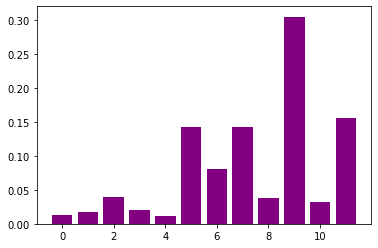

In [680]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance, color = 'purple')
plt.show()